In [95]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [96]:
data = pd.read_csv('../data/bandung/jams agg bandung.csv')
data = data.iloc[:,1:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17982 entries, 0 to 17981
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              17982 non-null  object 
 1   street            17982 non-null  object 
 2   level             17982 non-null  int64  
 3   median_length     17982 non-null  float64
 4   median_delay      17982 non-null  float64
 5   median_speed_kmh  17982 non-null  float64
 6   median_record     17982 non-null  float64
 7   id                17982 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [97]:
data.sample(10)

,date,street,level,median_length,median_delay,median_speed_kmh,median_record,id
14276,2022-08-23,Parakan Saat,1,561.00,76.50,11.850000,2.0,2022-08-23_Parakan Saat
15692,2022-08-28,Jalan Ambon,2,290.00,75.50,7.145000,4.0,2022-08-28_Jalan Ambon
16713,2022-08-31,Pungkur,3,570.75,111.00,10.950000,12.0,2022-08-31_Pungkur
11373,2022-08-13,Tubagus Ismail,2,1001.00,128.50,11.970000,19.0,2022-08-13_Tubagus Ismail
15414,2022-08-27,Jalan Purwakarta,2,627.00,105.00,13.090000,10.0,2022-08-27_Jalan Purwakarta
103,2022-07-06,Guntursari Wetan,2,390.00,93.00,8.870000,6.0,2022-07-06_Guntursari Wetan
2734,2022-07-15,Wa'as,4,219.00,101.00,5.060000,6.0,2022-07-15_Wa'as
17726,2022-09-04,Cihapit,2,437.50,87.00,8.270001,12.0,2022-09-04_Cihapit
4097,2022-07-20,Jalan Cimandiri,3,513.00,126.50,8.835000,3.0,2022-07-20_Jalan Cimandiri
16147,2022-08-29,Suryalaya,2,416.00,97.25,10.657500,4.5,2022-08-29_Suryalaya


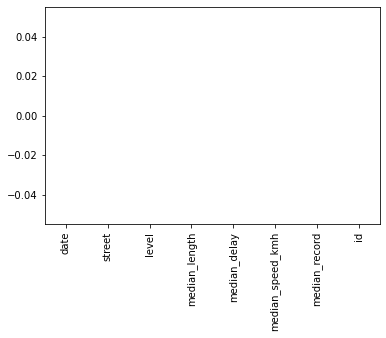

In [98]:
data.isnull().sum().plot(kind='bar')

In [99]:
data.columns

Index(['date', 'street', 'level', 'median_length', 'median_delay',
       'median_speed_kmh', 'median_record', 'id'],
      dtype='object')

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_9645/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


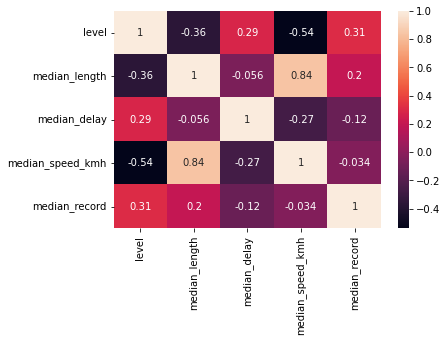

In [100]:
sns.heatmap(data.corr(),annot=True)

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_9645/2366356854.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.clustermap(data.corr(), center=0, cmap="vlag",


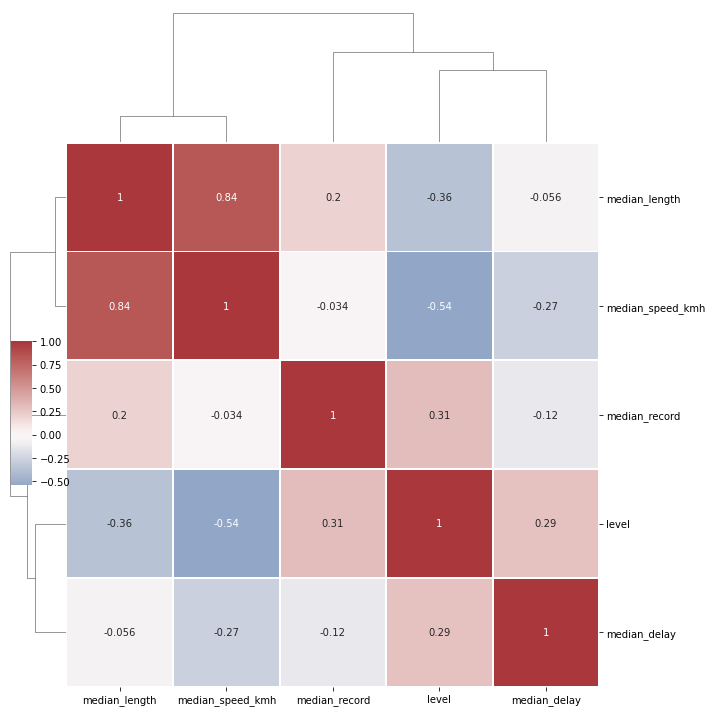

In [101]:
g = sns.clustermap(data.corr(), center=0, cmap="vlag",
                   annot=True,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75)

In [102]:
### Select feature without level 
X = data.loc[:,'median_length':'median_record']
X

,median_length,median_delay,median_speed_kmh,median_record
0,838.0,85.50,16.715000,15.0
1,374.0,172.50,4.520000,15.0
2,317.0,63.50,8.830000,7.0
3,341.0,111.00,6.735000,10.0
4,717.0,83.25,11.069999,6.5
...,...,...,...,...
17977,22.0,-1.00,0.000000,60.0
17978,1194.0,-1.00,0.000000,120.0
17979,571.0,124.50,11.340000,10.0
17980,1510.0,77.00,34.590000,6.0


In [103]:
#DE
sc = StandardScaler()
X_std = sc.fit_transform(X)
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_std)

In [104]:
X_append = pd.concat([pd.DataFrame(X_reduced),data['level']],axis=1)
X_append

,0,1,level
0,1.426726,-0.121420,2
1,-1.489308,-0.026346,3
2,-0.590733,-0.391167,2
3,-1.019087,-0.210417,3
4,0.349672,0.105990,1
...,...,...,...
17977,-1.309147,-5.090853,5
17978,1.657327,-8.604177,5
17979,-0.043382,0.234063,3
17980,4.984238,1.510727,2


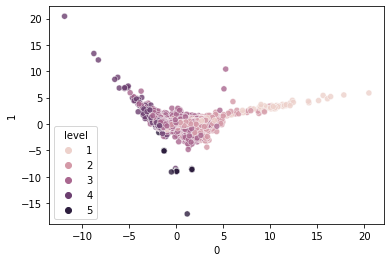

In [105]:
sns.scatterplot(data=X_append,x=0,y=1,hue='level',alpha=0.8)

Kmeans


Cluster by only the data point, (not time series based cluster)

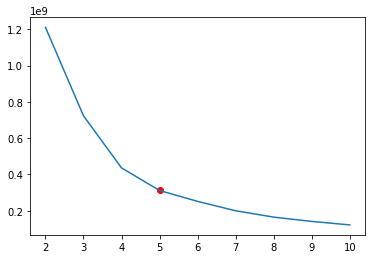

In [106]:
# X without feature level
wcss = []

for i in range(2,11):
   kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)

plt.plot(range(2,11),wcss)
plt.scatter(5,wcss[3],c='r')  

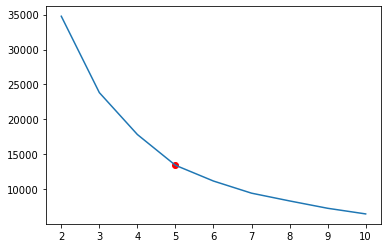

In [107]:
# data for data been processed with PCA

wcss = []

for i in range(2,11):
   kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
   kmeans.fit(X_append.iloc[:,:2])
   wcss.append(kmeans.inertia_)

plt.plot(range(2,11),wcss)
plt.scatter(5,wcss[3],c='r')  

In [108]:
X_append

,0,1,level
0,1.426726,-0.121420,2
1,-1.489308,-0.026346,3
2,-0.590733,-0.391167,2
3,-1.019087,-0.210417,3
4,0.349672,0.105990,1
...,...,...,...
17977,-1.309147,-5.090853,5
17978,1.657327,-8.604177,5
17979,-0.043382,0.234063,3
17980,4.984238,1.510727,2


In [109]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X_append.iloc[:,:2])

X_feature_clus = X_append.iloc[:,:2].copy()
X_feature_clus['y5'] = y_kmeans

In [110]:
data = pd.concat([data,X_feature_clus['y5']],axis=1)

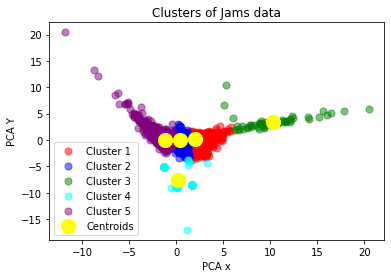

In [111]:
plt.scatter(X_feature_clus[X_feature_clus['y5'] == 0][0], X_feature_clus[X_feature_clus['y5'] == 0][1], s = 50, c = 'red', label = 'Cluster 1',alpha=0.5)
plt.scatter(X_feature_clus[X_feature_clus['y5'] == 1][0], X_feature_clus[X_feature_clus['y5'] == 1][1], s = 50, c = 'blue', label = 'Cluster 2',alpha=0.5)
plt.scatter(X_feature_clus[X_feature_clus['y5'] == 2][0], X_feature_clus[X_feature_clus['y5'] == 2][1], s = 50, c = 'green', label = 'Cluster 3',alpha=0.5)
plt.scatter(X_feature_clus[X_feature_clus['y5'] == 3][0], X_feature_clus[X_feature_clus['y5'] == 3][1], s = 50, c = 'cyan', label = 'Cluster 4',alpha=0.5)
plt.scatter(X_feature_clus[X_feature_clus['y5'] == 4][0], X_feature_clus[X_feature_clus['y5'] == 4][1], s = 50, c = 'purple', label = 'Cluster 5',alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Jams data')
plt.xlabel('PCA x')
plt.ylabel('PCA Y')
plt.legend()
plt.show()

kurang terpisahkan, maka kita bisa pilih untuk wcss n cluster yang lebih sedikit, sehingga bisa terlihat perbedaanya

In [112]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X_append.iloc[:,:2])

X_feature_clus = X_append.iloc[:,:2].copy()
X_feature_clus['y3'] = y_kmeans

In [113]:
data = pd.concat([data,X_feature_clus['y3']],axis=1)

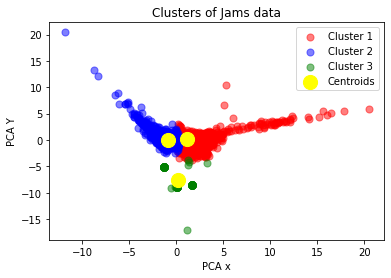

In [114]:
plt.scatter(X_feature_clus[X_feature_clus['y3'] == 0][0], X_feature_clus[X_feature_clus['y3'] == 0][1], s = 50, c = 'red', label = 'Cluster 1',alpha=0.5)
plt.scatter(X_feature_clus[X_feature_clus['y3'] == 1][0], X_feature_clus[X_feature_clus['y3'] == 1][1], s = 50, c = 'blue', label = 'Cluster 2',alpha=0.5)
plt.scatter(X_feature_clus[X_feature_clus['y3'] == 2][0], X_feature_clus[X_feature_clus['y3'] == 2][1], s = 50, c = 'green', label = 'Cluster 3',alpha=0.5)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Jams data')
plt.xlabel('PCA x')
plt.ylabel('PCA Y')
plt.legend()
plt.show()

In [115]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X_append.iloc[:,:2])

X_feature_clus = X_append.iloc[:,:2].copy()
X_feature_clus['y4'] = y_kmeans

In [116]:
data = pd.concat([data,X_feature_clus['y4']],axis=1)

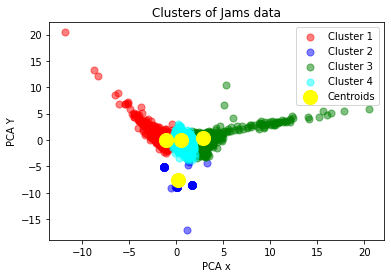

In [117]:
plt.scatter(X_feature_clus[X_feature_clus['y4'] == 0][0], X_feature_clus[X_feature_clus['y4'] == 0][1], s = 50, c = 'red', label = 'Cluster 1',alpha=0.5)
plt.scatter(X_feature_clus[X_feature_clus['y4'] == 1][0], X_feature_clus[X_feature_clus['y4'] == 1][1], s = 50, c = 'blue', label = 'Cluster 2',alpha=0.5)
plt.scatter(X_feature_clus[X_feature_clus['y4'] == 2][0], X_feature_clus[X_feature_clus['y4'] == 2][1], s = 50, c = 'green', label = 'Cluster 3',alpha=0.5)
plt.scatter(X_feature_clus[X_feature_clus['y4'] == 3][0], X_feature_clus[X_feature_clus['y4'] == 3][1], s = 50, c = 'cyan', label = 'Cluster 4',alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Jams data')
plt.xlabel('PCA x')
plt.ylabel('PCA Y')
plt.legend()
plt.show()

In [121]:
list_of_level = [1,2,3,4,5]
cols = ['y5','y3','y4']
for i in range(3):
    for j in list_of_level:
        print(j)
        print(data[data.level==j]['y5'].unique())
        print(data[data.level==j]['y3'].unique())
        print(data[data.level==j]['y4'].unique())

1
[1 4 0 2]
[0 1]
[3 0 2]
2
[0 4 1 2 3]
[0 1 2]
[3 0 2 1]
3
[4 0 1 2 3]
[1 0 2]
[0 2 3 1]
4
[4 3 1]
[1 2 0]
[0 1 3]
5
[3 4]
[2 1]
[1 0]
1
[1 4 0 2]
[0 1]
[3 0 2]
2
[0 4 1 2 3]
[0 1 2]
[3 0 2 1]
3
[4 0 1 2 3]
[1 0 2]
[0 2 3 1]
4
[4 3 1]
[1 2 0]
[0 1 3]
5
[3 4]
[2 1]
[1 0]
1
[1 4 0 2]
[0 1]
[3 0 2]
2
[0 4 1 2 3]
[0 1 2]
[3 0 2 1]
3
[4 0 1 2 3]
[1 0 2]
[0 2 3 1]
4
[4 3 1]
[1 2 0]
[0 1 3]
5
[3 4]
[2 1]
[1 0]


pemetaan cluster manapun tidak satu-satu terhadap level